<img style="float: right;" width="120" src="http://neueda.conygre.com/pydata/images/neueda-logo.jpeg">
<img style="float: left; margin-top: 0" width="80" src="http://neueda.conygre.com/pydata/images/client-logo.png">
<br><br><br>


# Calculate the Bollinger Band for

> the month moving average of the Closing price for AAPL

## Import the libraries 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr

%matplotlib inline

## Load the data into a DataFrame


In [4]:
#df = pd.read_excel(io='http://neueda.conygre.com/pydata/market_data.xls',
#                   sheet_name='AAPL',
#                   index_col='Date', 
#                   parse_dates=True)

df = pdr.get_data_yahoo('AAPL', '2000-01-01')

pd.concat([df.head(), df.tail()])

High         Low        Open       Close       Volume  \
Date                                                                      
2000-01-03    1.004464    0.907924    0.936384    0.999442  535796800.0   
2000-01-04    0.987723    0.903460    0.966518    0.915179  512377600.0   
2000-01-05    0.987165    0.919643    0.926339    0.928571  778321600.0   
2000-01-06    0.955357    0.848214    0.947545    0.848214  767972800.0   
2000-01-07    0.901786    0.852679    0.861607    0.888393  460734400.0   
2020-08-27  127.485001  123.832497  127.142502  125.010002  155552400.0   
2020-08-28  126.442497  124.577499  126.012497  124.807503  187630000.0   
2020-08-31  131.000000  126.000000  127.580002  129.039993  225702700.0   
2020-09-01  134.800003  130.529999  132.759995  134.179993  151948100.0   
2020-09-02  137.979996  127.000000  137.589996  131.399994  195062201.0   

             Adj Close  
Date                    
2000-01-03    0.863657  
2000-01-04    0.790842  
2000-01-05    0.802415  
2000-01-06    0.732975  
2000-01-07    0.767695  
2020-08-27  125.010002  
2020-08-28  124.807503  
2020-08-31  129.039993  
2020-09-01  134.179993  
2020-09-02  131.399994

## Check what has been imported into the DataFrame
- Have a quick look at what we have read in
- No right or wrong way to do this
- Depends on your style, personal preferences, type of data being read in etc
- A few examples
> `df.tail()`
`df.head()`
`df.describe()`
    
**IMPORTANT**<br>
>When working with DataFrames that have Dates as an index, make sure the date values are sorted in an ascending manner

In [4]:
df['Close'].pct_change().hist(bins=50)

## Calculate the Bollinger Bands for the Adj. Close

- **Middle Band** = Monthly moving average <br>
- **Upper Band** = Monthly moving average + (Monthly standard deviation of price x 2) 
- **Lower Band** = Monthly moving average - (Monthly standard deviation of price x 2)

In [5]:
# 30 days is a good approximation of a single month
df['30d mavg'] = df['Close'].rolling(window=30).mean()
df['30d std'] = df['Close'].rolling(window=30).std()

df['Upper Band'] = df['30d mavg'] + (df['30d std'] * 2)
df['Lower Band'] = df['30d mavg'] - (df['30d std'] * 2)

## Plot the results

Use the matplot lib defaults

A plot of the entire series of values

In [6]:
# create a list of the column names we are interested in plotting

cols = ['30d mavg','Upper Band','Lower Band', 'Close']
        
df_Boll = df[cols]['2016']
df_Boll.plot()

## Plot the results 

> of all data from the start of 2016 to the end of the series

Here use Slice from '2016 to the end

# Improve the presentation of the chart

Here I am 
- 'shading' in the regions between the upper and lower bands
- adding a title, a legend and some labels

The important parts of the python code are

> **style** - fivethirtyeight <br>
**figsize** - dimensions of plot in inches. This is an approximation for computer screens but is more accurate for printing plots<br>
**fill_between** - shades in areas betrween 2 lines

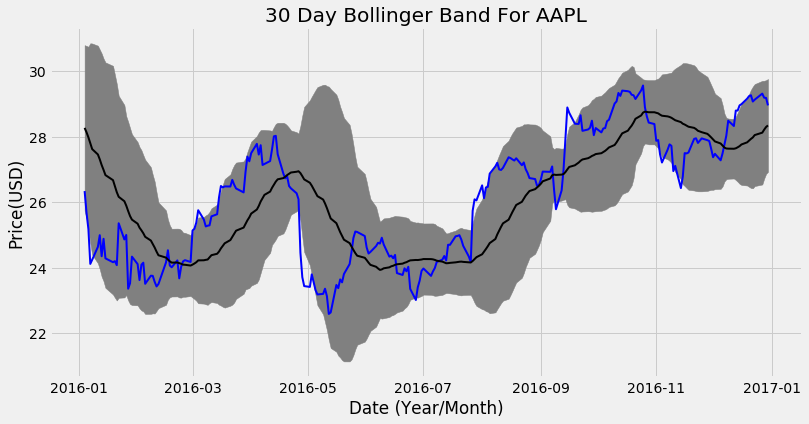

In [12]:
# set style, empty figure and axes
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

# Get index values for the X axis for the DataFrame
x_axis = df_Boll.index.get_level_values(0)

# Plot shaded 'win' Day Bollinger Band for Facebook
ax.fill_between(x_axis, 
                df_Boll['Upper Band'], 
                df_Boll['Lower Band'], 
                color='grey')

ax.plot(x_axis, df_Boll['Close'], color='blue', lw=2)
ax.plot(x_axis, df_Boll['30d mavg'], color='black', lw=2)

# Set Title & Show the Image
ax.set_title('30 Day Bollinger Band For AAPL')
ax.set_xlabel('Date (Year/Month)')
ax.set_ylabel('Price(USD)')

plt.show();
